### Introduction to the pytorch workflow
* Prepare data
* Build model
* fitting the model to data( training)
* Making predictions and evaluating a model(inference)
* Saving and loading a model
* Putting it all together

In [1]:
import torch
from torch import nn #nn contains all of pytorch building blocks for neural networks
import matplotlib.pyplot as plt


### Data (preparing and loading)
Data can be almost anything in machine learning
* Excel spreadsheet
* Images of any kind
* Videos
* Audio like songs or podcasts
* DNA 
* Text

So basically ML is a game in two parts
* Get data into numerical representations
* Build a model to learn patterns in that numerical representation


In [2]:
# linear regression with known parameters
# y=weight*x + bias or y=mx+c
#create known parameter
weight=0.7
bias=0.3
#create dataset
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
Y=weight*X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

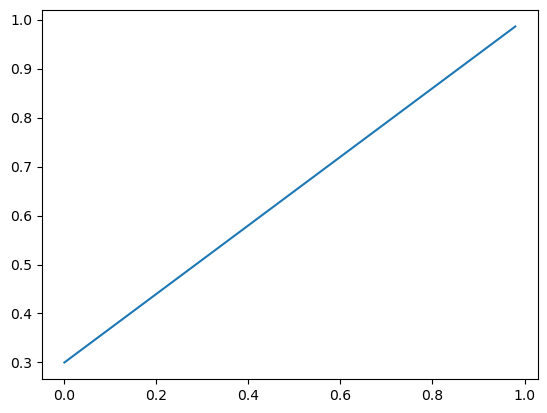

In [3]:
plt.plot(X,Y)

### Splitting data into training and test set in pytorch

In [4]:
train_split=int(0.8 * len(X))
X_train,Y_train=X[:train_split],Y[:train_split]

X_test,Y_test=X[train_split:],Y[train_split:]

len(X_train),len(Y_train),len(X_test),len(Y_test)


(40, 40, 10, 10)

### Data Visualization
Building a function for plotting and visualizing our data

In [5]:
def data_visualization(train_data=X_train,
                       train_labels=Y_train,
                       test_data=X_test,
                       test_labels=Y_test,
                       predictions=None):
    plt.figure(figsize=(8,4))
    #plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    #plot test data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
    # check if there are predictions
    if predictions is not None:
        #plot predictions as red
        plt.scatter(test_data,predictions,c='r',s=4,label="Predictions")
    plt.legend()    


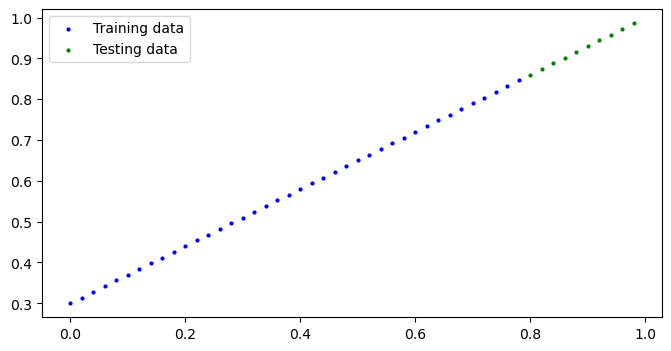

In [6]:
data_visualization()

### Creating our first model using torch.nn
* All models are going to be created using classes
* Models must inherit from nn.module

What does our model do?
* Start with random values ( weights and bias)
* Look at the training data and adjust the random values to better represent the (or get closer to) the ideal values(the weight & bias values we used to create the data)

How does it do this?
* Gradient descent
* Backpropagation


`*Note: fucntion annotations are used in the "forward function" `x:torch.tensor` - to tell that the accepted data type is a torch tensor `->torch.Tensor` an arrow return function notation is used to tell the return type of the function*`

In [7]:
#create a linear regression model ca
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        #Initialize model parameters
        self.weights=nn.Parameter(torch.randn(1,#start with a random weight and try to adjust to the ideal weight
                                              requires_grad=True,# can this parameter be updated via gradient descent
                                              dtype=float))
        self.bias=nn.Parameter(torch.randn(1,#start with a random bias and try to adjust to the ideal bias
                                           requires_grad=True,# can this parameter be updated via gradient descent
                                           dtype=float))
    #forward propagation method to define the computation in the model
    def forward(self,x:torch.Tensor)->torch.Tensor:  
        return self.weights * x +self.bias 

In [8]:
#create a random seed
torch.manual_seed(42)
#create an instance of the LinearRegressionModel class
model1=LinearRegressionModel()

#check out the parameters
list(model1.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

### making predictions with our model using torch.inference_mode()

In [9]:
with torch.inference_mode():
    y_preds=model1(X_test)
y_preds    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

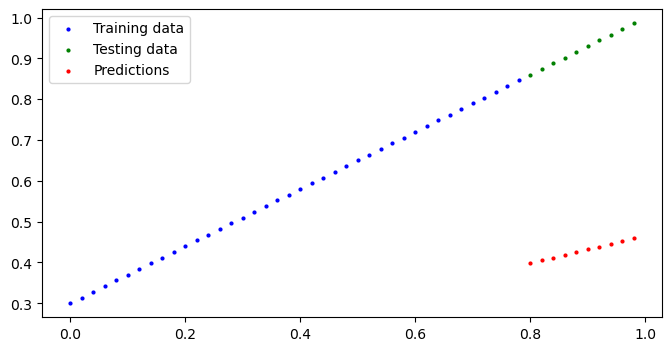

In [10]:
data_visualization(predictions=y_preds)

### Training our model
Things needed to train model

* Using a loss function to determine our margin of error
* Using an Optimizer: which takes into account the loss of a model and adjusts the model parameters accordingly

We achieve this in pytorch using a:
* Training loop
* Testing Loop

In [11]:
#setup a loss function
loss_fn=nn.L1Loss()

#setup an optimizer(stochastic gradient descent)
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.001)

### Building a training loop ( and a testing loop) in pytorch

What we need:
1. Loop through the data
2. forward pass( this involves data moving through our models forward function)-forward propagation
3. Calculate the loss(compare forward pass predictions to ground truth value)
4. Optimizer zero grad
5. Loss backward-back propagation( move backward through the network to calculate the gradient of each of the parameters of our model with respect to the loss)
6. Optimizer step-use the optimizer to adjust our model parameters to try and improve the loss


In [12]:
#An epoch is one loop through the data
epochs=2000
#test tracking
epoch_count=[]
loss_count=[]
test_loss_count=[]
#1 loop through the data
for epoch in range (epochs):
    #set the model to training mode
    model1.train()# train mode in pytorch set

    #2.Forward pass
    y_preds=model1(X_train)
    #3. calculate loss
    loss=loss_fn(y_preds,Y_train)
    #optimize zero grad
    optimizer.zero_grad()
    #5 perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    #step the optimizer (perform gradient descent)
    optimizer.step()
    ##### Testing #####
    model1.eval() #turns on different functions and layers not needed for evaluation and testing
    with torch.inference_mode():## inference mode turns off gradient tracking
        #do the forward pass
        test_pred=model1(X_test)

        #calculate the loss
        test_loss=loss_fn(test_pred,Y_test) 
    if epoch %10==0:
        epoch_count.append(epoch)
        loss_count.append(loss)
        test_loss_count.append(test_loss)
        print(f'Epoch:{epoch}|Loss:{loss}|Test Loss:{test_loss}')    





Epoch:0|Loss:0.31288135683755547|Test Loss:0.4931890841222012
Epoch:10|Loss:0.30136035690119073|Test Loss:0.4797180841576173
Epoch:20|Loss:0.289839356964826|Test Loss:0.46624708419303335
Epoch:30|Loss:0.2783183570284613|Test Loss:0.4527760842284495
Epoch:40|Loss:0.2667973570920966|Test Loss:0.4393050842638657
Epoch:50|Loss:0.25527635715573194|Test Loss:0.4258340842992817
Epoch:60|Loss:0.24375535721936722|Test Loss:0.4123630843346978
Epoch:70|Loss:0.2322343572830025|Test Loss:0.3988920843701139
Epoch:80|Loss:0.22071335734663786|Test Loss:0.3854210844055301
Epoch:90|Loss:0.20919235741027312|Test Loss:0.37195008444094624
Epoch:100|Loss:0.19767135747390846|Test Loss:0.3584790844763623
Epoch:110|Loss:0.18615035753754378|Test Loss:0.34500808451177845
Epoch:120|Loss:0.1746293576011791|Test Loss:0.33153708454719455
Epoch:130|Loss:0.1631083576648144|Test Loss:0.31806608458261065
Epoch:140|Loss:0.15158735772844972|Test Loss:0.3045950846180268
Epoch:150|Loss:0.140066357792085|Test Loss:0.29112408

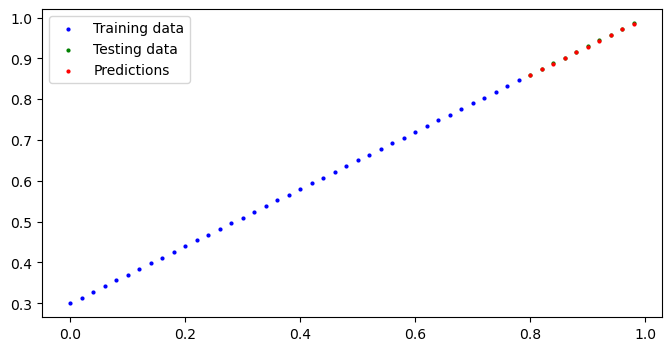

In [13]:
with torch.inference_mode():
    y_preds=model1(X_test)


data_visualization(predictions=y_preds)

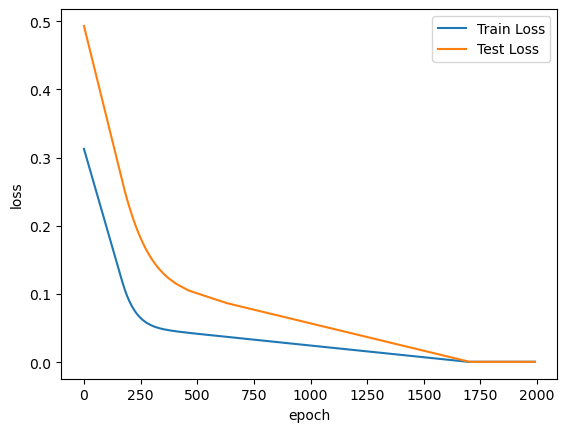

In [14]:
import numpy as np
#plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_count).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_count,label="Test Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

### Saving a model in Pytorch
There are three main methods for saving and loading models in Pytorch:
1. `torch.save()`- allows you save a model in python pickle format (python object serialization)
2. `torch.load()`-allows you to load a saved model
3. `torch.nn.Modules.load_state_dict()`-this allows you to load a models saved state dictionary dictionary

In [17]:
#saving our pytorch model
from pathlib import Path
#create model directorty
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create model save path
MODEL_NAME="01_linear regression.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#SAVE model save dict
torch.save(obj=model1.state_dict(),f=MODEL_SAVE_PATH)

# Loading a saved model
 load the model state_dict and create a new instance of the model class 


In [22]:
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>